## Results from Section 6.4.

Data is for 3D quantities using the normal FoV and the fiducial method.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import json
from astropy.io import fits


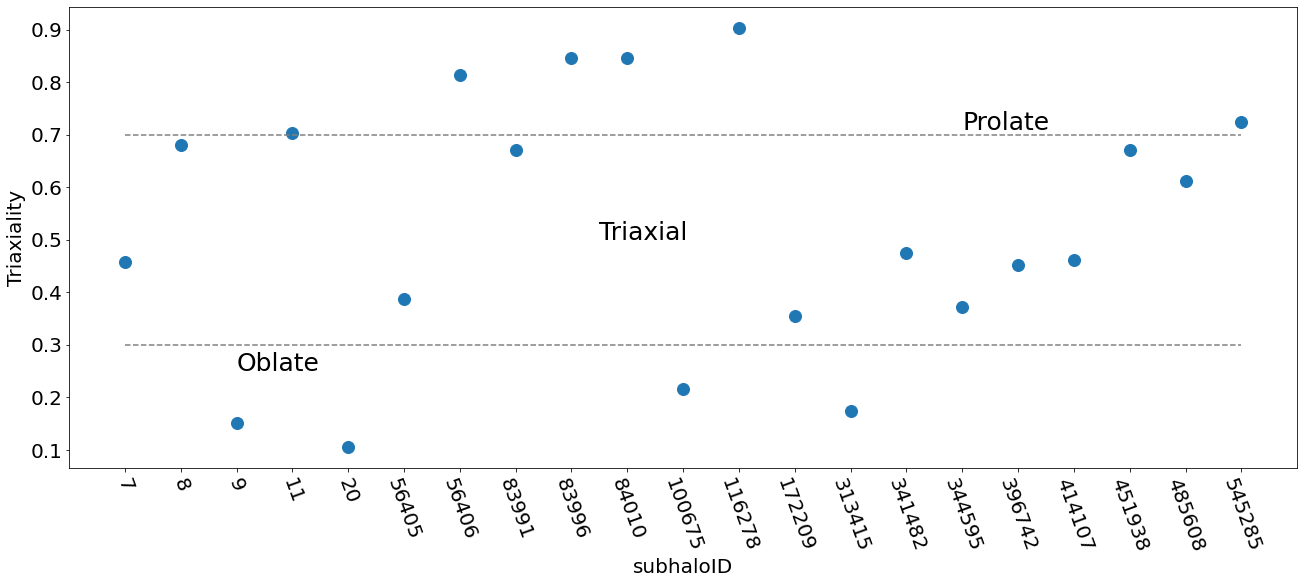

In [26]:
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]


## Here we are ploting the Triaxiality for the whole sample.

T = []
for s in subhalos:
    log = fits.open("/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/TNG50-1-snap84-subhalo{}/imgs/log_img.fits".format(s))[1].data
    T.append(log["triaxiality_star"])
    
Nsubhalos = len(subhalos)  # Number of subhalos
x = np.arange(0, Nsubhalos, 1)   # just to plot

fig, ax = plt.subplots(layout='constrained', figsize=(18,8))
plt.plot(x, T, "o", markersize=12)

ax.hlines(y=0.3, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")
plt.text(x=2, y=0.25, s='Oblate', size=25)

ax.hlines(y=0.7, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")
plt.text(x=15, y=0.71, s='Prolate', size=25)

plt.text(x=8.5, y=0.50, s='Triaxial', size=25)

ax.set_xticks(x, subhalos)
ax.set_xlabel("subhaloID", size=20)
ax.set_ylabel("Triaxiality", size=20)
plt.xticks(size=20, rotation=-70)
plt.yticks(size=20);

## Results whitin  2.5R$_{\text{Eff}}$

In [3]:
# Column 0 for Jam result, Column 1 for dyLens 
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)  # Number of subhalos

    # Intrinsic "true" quantities 
Dstar  = np.empty([Nsubhalos,2])   # Fractional difference in stellar mass
Ddm    = np.empty([Nsubhalos,2])   # Fractional difference in dm mass
Dtotal = np.empty([Nsubhalos,2])   # Fractional difference in total mass
Dfdm   = np.empty([Nsubhalos,2])   # Fractional difference in dm fraction

Mstar  = np.empty([Nsubhalos]) # "True" stellar mass
Mdm    = np.empty([Nsubhalos]) # "True" dm mass
Mtotal = np.empty([Nsubhalos]) # "True" total mass
Mfdm   = np.empty([Nsubhalos]) # "True" dark matter fraction


In [27]:
    # Where to store the results
MMstar_jam    = np.empty([Nsubhalos, 1])        # JAM measurement of stellar mass 
MMstar_dyLens_shear = np.empty([Nsubhalos, 1])  # dyLens+shear measurement of stellar mass

MMtotal_jam    = np.empty([Nsubhalos, 1])       # JAM measurement of total mass 
MMtotal_dyLens_shear = np.empty([Nsubhalos, 1]) # dyLens+shear measurement of total mass 

MMdm_jam    = np.empty([Nsubhalos, 1])          # JAM measurement of dark matter mass
MMdm_dyLens_shear = np.empty([Nsubhalos, 1])    # dyLens+shear measurement of dark matter mass

MMfdm_jam    = np.empty([Nsubhalos, 1])          # JAM measurement of dark matter fraction
MMfdm_dyLens_shear = np.empty([Nsubhalos, 1])    # dyLens+shear measurement of dark matter fraction
    


In [28]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/normal/JAM/Fiducial/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        jam = json.load(f)
        f.close()
    

    with open("./{}/model1/normal/shear/dyLens/phase5/Fiducial/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        dyLens_shear = json.load(f)
        f.close()
    
    Dstar[i][0] = jam["Dstar"]
    Dstar[i][1] = dyLens_shear["Dstar"]
    
    Ddm[i][0] = jam["Ddm"]
    Ddm[i][1] = dyLens_shear["Ddm"]
    
    Dtotal[i][0] = jam["Dtotal"]
    Dtotal[i][1] = dyLens_shear["Dtotal"]
    
    Dfdm[i][0] = jam["Dfdm"]
    Dfdm[i][1] = dyLens_shear["Dfdm"]    
    
    Mstar[i]  = dyLens_shear["Mstar"]
    Mdm[i]    = dyLens_shear["Mdm"]
    Mtotal[i] = dyLens_shear["Mtotal"] 
    Mfdm[i]   = dyLens_shear["fdm"]
    
    MMstar_jam[i]    = jam["MMstar"]
    MMstar_dyLens_shear[i] = dyLens_shear["MMstar"]
    
    MMtotal_jam[i]    = jam["MMtotal"]
    MMtotal_dyLens_shear[i] = dyLens_shear["MMtotal"]
    
    MMdm_jam[i]    = jam["MMdm"]
    MMdm_dyLens_shear[i] = dyLens_shear["MMdm"]
    
    MMfdm_jam[i]    = jam["Mfdm"]
    MMfdm_dyLens_shear[i] = dyLens_shear["Mfdm"]
    


In [38]:
# To make some plots

def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

def make_plot(dataset_true, dataset_jam, dataset_dyLens_shear,
                 diff_dataset,
                 title, label, fdm=False):

    plt.figure(figsize=(15,8))
    plt.suptitle(title, fontsize=14)

    plt.subplot(121)

    plt.scatter(x=dataset_true, y=dataset_jam[:], s=10, color="orange", label="JAM")

    plt.scatter(x=dataset_true, y=dataset_dyLens_shear[:], s=10, color="royalblue", label="dyLens+shear")

    r = np.linspace(dataset_true.min(), dataset_true.max())
    plt.plot(r, r, color="gray", linestyle="--")

    plt.legend(fontsize=13)
    if fdm:
        plt.xlabel(r"Input $f_{DM}$",  size=14)
        plt.ylabel(r"Output $f_{DM}$",  size=14)
    else:       
        plt.xlabel(r"Input [${\log_{10}(M/M_{\odot})}]$",  size=14)
        plt.ylabel(r"Output [${\log_{10}(M/M_{\odot})}]$",  size=14)



    plt.subplot(122)
    m, hi, lo = median_hi_lo(diff_dataset[:,0])
    _ = plt.hist(Dstar[:,0], bins=5, density=False,  color="orange",
                 label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    m, hi, lo = median_hi_lo(diff_dataset[:,1])
    _ = plt.hist(Dstar[:,1], bins=5, density=False, alpha=0.8, color="royalblue",
                 label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    plt.legend(fontsize=13)
    plt.xlabel(label, size=14)
    plt.ylabel("#Number of subhalos", size=14)

    plt.xticks(size=12)
    plt.yticks(size=12)


    plt.tight_layout()

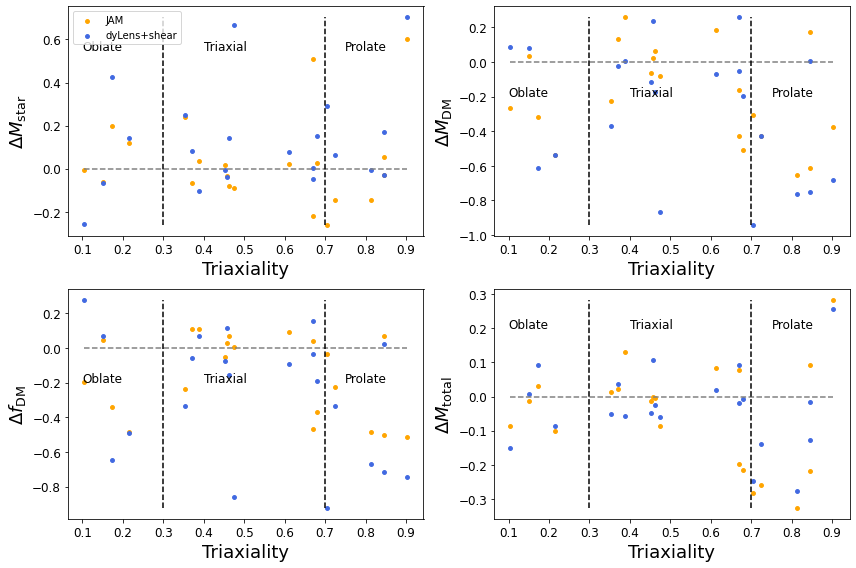

In [30]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Adicionar os dados aos subplots
    # Stellar mass
axs[0, 0].scatter(x=T, y=Dstar[:,0], s=15, color="orange", label="JAM")
axs[0, 0].scatter(x=T, y=Dstar[:,1], s=15, color="royalblue", label="dyLens+shear")
axs[0, 0].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[0, 0].set_xlabel('Triaxiality', size=18)
axs[0, 0].set_ylabel(r"${\Delta M_{\rm star}}$", size=18)

ymin = np.minimum(Dstar[:,0], Dstar[:,1]).min()
ymax = np.maximum(Dstar[:,0], Dstar[:,1]).max()

axs[0, 0].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 0].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 0].text(y=0.55, x=0.1, s='Oblate', size=12)
axs[0, 0].text(y=0.55, x=0.75, s='Prolate', size=12)
axs[0, 0].text(y=0.55, x=0.40, s='Triaxial', size=12)
axs[0, 0].legend()

    # DM mass
axs[0, 1].scatter(x=T, y=Ddm[:,0], s=15, color="orange", label="JAM")
axs[0, 1].scatter(x=T, y=Ddm[:,1], s=15, color="royalblue", label="dyLens+shear")
axs[0, 1].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[0, 1].set_xlabel('Triaxiality', size=18)
axs[0, 1].set_ylabel(r"${\Delta M_{\rm DM}}$", size=18)

ymin = np.minimum(Ddm[:,0], Ddm[:,1]).min()
ymax = np.maximum(Ddm[:,0], Ddm[:,1]).max()

axs[0, 1].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 1].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 1].text(y=-0.2, x=0.1, s='Oblate', size=12)
axs[0, 1].text(y=-0.2, x=0.75, s='Prolate', size=12)
axs[0, 1].text(y=-0.2, x=0.40, s='Triaxial', size=12)

 # DM fraction
axs[1, 0].scatter(x=T, y=Dfdm[:,0], s=15, color="orange", label="JAM")
axs[1, 0].scatter(x=T, y=Dfdm[:,1], s=15, color="royalblue", label="dyLens+shear")
axs[1, 0].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[1, 0].set_xlabel('Triaxiality', size=18)
axs[1, 0].set_ylabel(r"${\Delta f_{\rm DM}}$", size=18)

ymin = np.minimum(Dfdm[:,0], Dfdm[:,1]).min()
ymax = np.maximum(Dfdm[:,0], Dfdm[:,1]).max()

axs[1, 0].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 0].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 0].text(y=-0.2, x=0.1, s='Oblate', size=12)
axs[1, 0].text(y=-0.2, x=0.75, s='Prolate', size=12)
axs[1, 0].text(y=-0.2, x=0.40, s='Triaxial', size=12)


 # Total mass
axs[1, 1].scatter(x=T, y=Dtotal[:,0], s=15, color="orange", label="JAM")
axs[1, 1].scatter(x=T, y=Dtotal[:,1], s=15, color="royalblue", label="dyLens+shear")
axs[1, 1].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[1, 1].set_xlabel('Triaxiality', size=18)
axs[1, 1].set_ylabel(r"${\Delta M_{\rm total}}$", size=18)

ymin = np.minimum(Dtotal[:,0], Dtotal[:,1]).min()
ymax = np.maximum(Dtotal[:,0], Dtotal[:,1]).max()

axs[1, 1].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 1].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 1].text(y=0.2, x=0.1, s='Oblate', size=12)
axs[1, 1].text(y=0.2, x=0.75, s='Prolate', size=12)
axs[1, 1].text(y=0.2, x=0.40, s='Triaxial', size=12)

# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

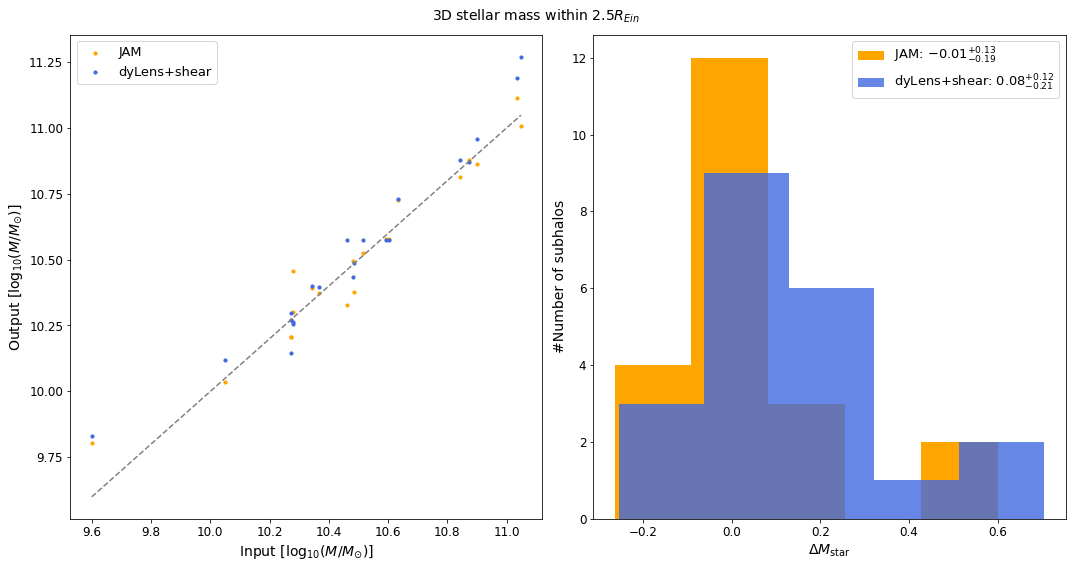

In [40]:
    # Stellar mass plot
make_plot(dataset_true=Mstar,
          dataset_jam=MMstar_jam, 
          dataset_dyLens_shear=MMstar_dyLens_shear,
          diff_dataset=Dstar,
         title=r"3D stellar mass within $2.5R_{Ein}$", label=r"${\Delta M_{\rm star}}$")

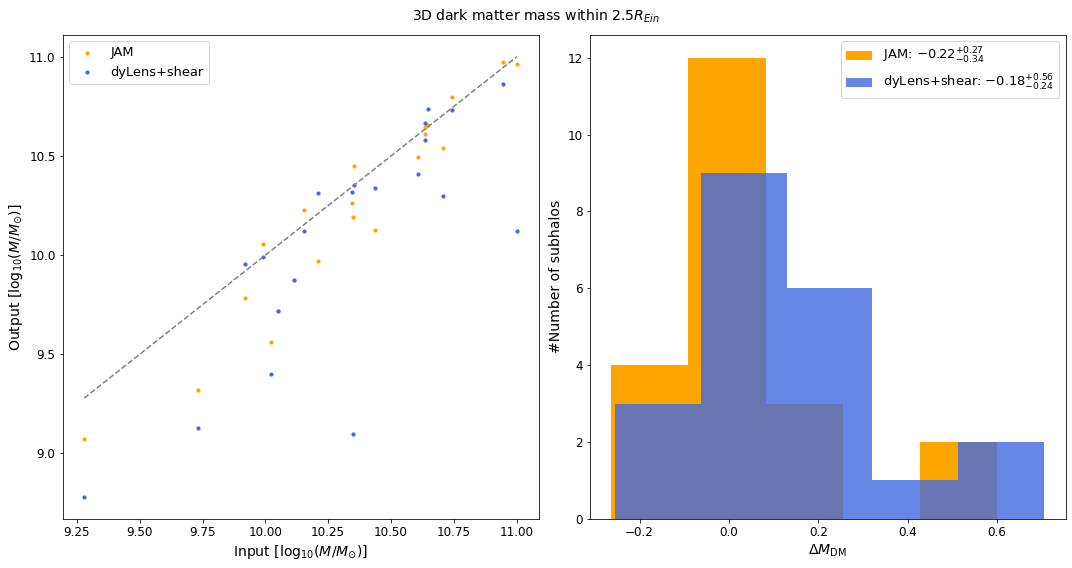

In [41]:
    # Dark matter mass
make_plot(dataset_true=Mdm,
          dataset_jam=MMdm_jam, 
          dataset_dyLens_shear=MMdm_dyLens_shear,
          diff_dataset=Ddm,
         title=r"3D dark matter mass within $2.5R_{Ein}$", label=r"${\Delta M_{\rm DM}}$")

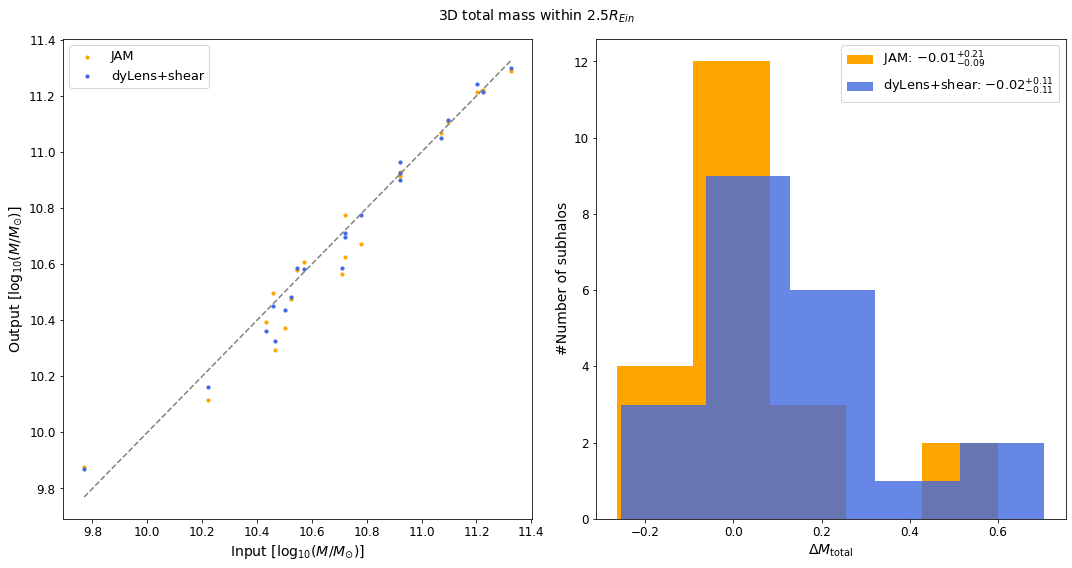

In [42]:
    # Total mass
make_plot(dataset_true=Mtotal,
          dataset_jam=MMtotal_jam, 
          dataset_dyLens_shear=MMtotal_dyLens_shear,
          diff_dataset=Dtotal,
         title=r"3D total mass within $2.5R_{Ein}$", label=r"${\Delta M_{\rm total}}$")

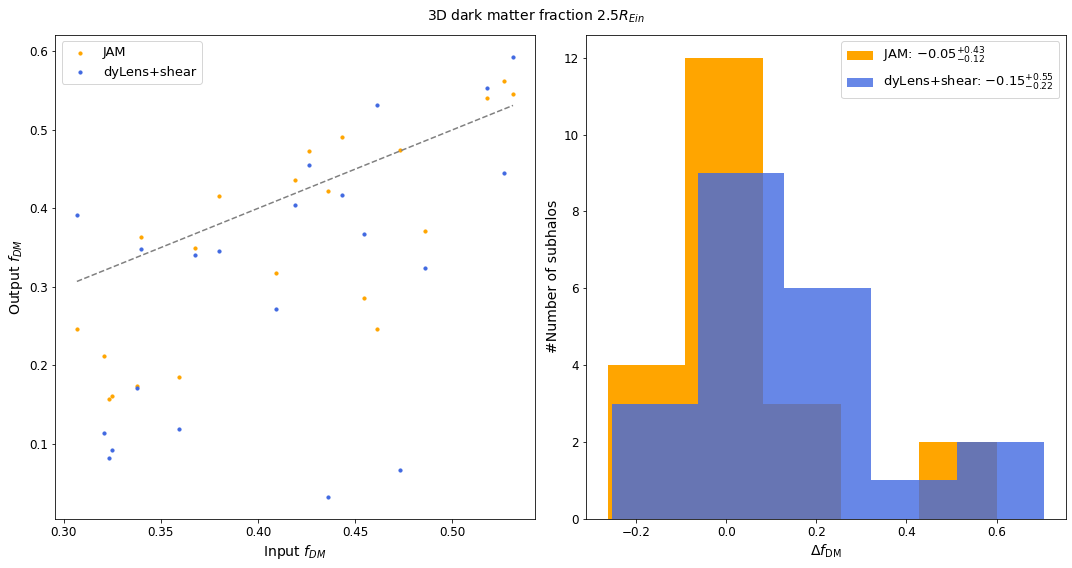

In [43]:
    # Dark matter fraction
make_plot(dataset_true=Mfdm,
          dataset_jam=MMfdm_jam, 
          dataset_dyLens_shear=MMfdm_dyLens_shear,
          diff_dataset=Dfdm,
         title=r"3D dark matter fraction $2.5R_{Ein}$", label=r"${\Delta f_{\rm DM}}$", fdm=True)

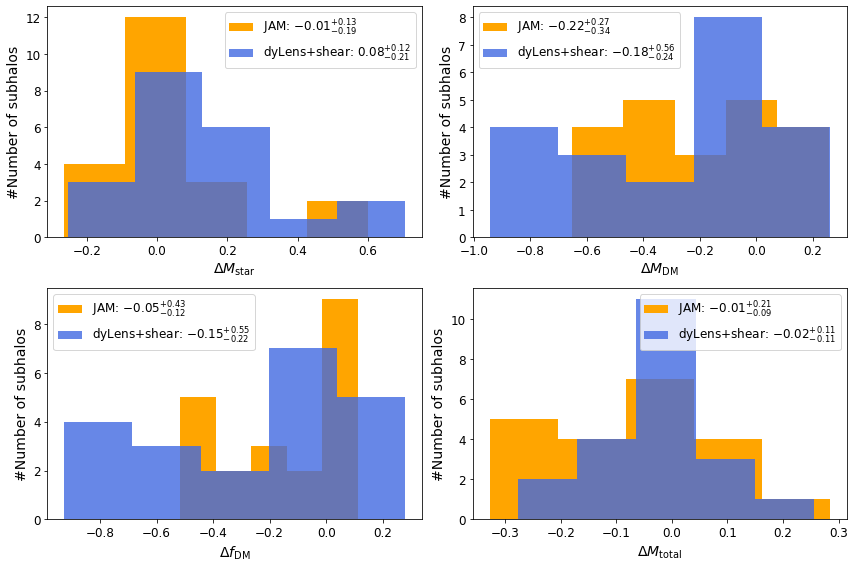

In [44]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Adicionar os dados aos subplots
    # Stellar mass
m, hi, lo = median_hi_lo(Dstar[:,0])  
axs[0, 0].hist(Dstar[:,0], bins=5, density=False,  color="orange",
                 label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Dstar[:,1])
axs[0, 0].hist(Dstar[:,1], bins=5, density=False, alpha=0.8, color="royalblue",
                 label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0, 0].set_ylabel("#Number of subhalos", size=14)
axs[0, 0].set_xlabel(r"${\Delta M_{\rm star}}$", size=14)
axs[0, 0].legend(fontsize=12)

    # DM mass
m, hi, lo = median_hi_lo(Ddm[:,0])  
axs[0, 1].hist(Ddm[:,0], bins=5, density=False,  color="orange",
                 label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Ddm[:,1])
axs[0, 1].hist(Ddm[:,1], bins=5, density=False, alpha=0.8, color="royalblue",
                 label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0, 1].set_ylabel("#Number of subhalos", size=14)
axs[0, 1].set_xlabel(r"${\Delta M_{\rm DM}}$", size=14)
axs[0, 1].legend(fontsize=12)

    # DM fraction
m, hi, lo = median_hi_lo(Dfdm[:,0])  
axs[1, 0].hist(Dfdm[:,0], bins=5, density=False,  color="orange",
                 label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Dfdm[:,1])
axs[1, 0].hist(Dfdm[:,1], bins=5, density=False, alpha=0.8, color="royalblue",
                 label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1, 0].set_ylabel("#Number of subhalos", size=14)
axs[1, 0].set_xlabel(r"${\Delta f_{\rm DM}}$", size=14)
axs[1, 0].legend(fontsize=12)


    # Total mass
m, hi, lo = median_hi_lo(Dtotal[:,0])  
axs[1, 1].hist(Dtotal[:,0], bins=5, density=False,  color="orange",
                 label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Dtotal[:,1])
axs[1, 1].hist(Dtotal[:,1], bins=5, density=False, alpha=0.8, color="royalblue",
                 label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1, 1].set_ylabel("#Number of subhalos", size=14)
axs[1, 1].set_xlabel(r"${\Delta M_{\rm total}}$", size=14)
axs[1, 1].legend(fontsize=12)

# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

In [45]:
results_3D = np.stack([Dstar, Ddm, Dtotal, Dfdm])

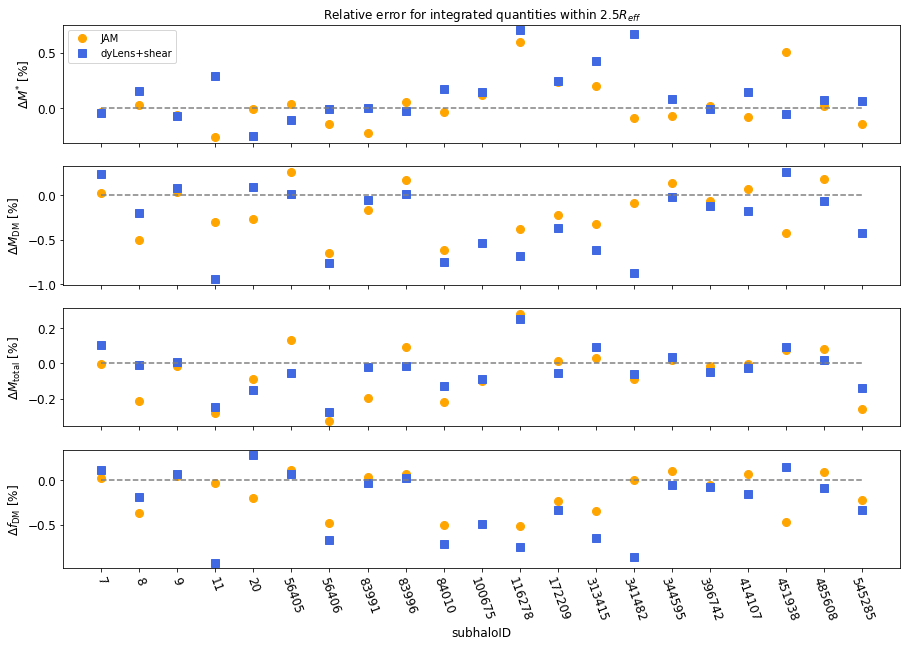

In [46]:
fig, axes = plt.subplots(4, figsize=(15, 10), sharex=True)
labels = [r"${\Delta M^{*}}$ [%]", r"${\Delta M_{\rm DM}}$ [%]",
         r"${\Delta M_{\rm total}}$ [%]", r"${\Delta f_{\rm DM}}$ [%]" ]
x = np.arange(0, Nsubhalos, 1)   # just to plot


for i in range(len(labels)):
    ax = axes[i]
    ax.set_xticks(x, subhalos)
    ax.plot(x, results_3D[i][:,0], "o", label="JAM", markersize=8, color="orange")
    ax.plot(x, results_3D[i][:,1], "s", label="dyLens+shear", markersize=8, color="royalblue")
    ax.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")
    ax.set_ylabel(labels[i], size=12)
    #ax.yaxis.set_label_coords(-0.1, 0.5)

axes[0].set_title("Relative error for integrated quantities within ${2.5 R_{eff}}$")
axes[0].legend()
axes[-1].set_xlabel("subhaloID", size=12)
plt.xticks(size=12, rotation=-70)
plt.yticks(size=12);

---